In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [75]:
df

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278
2768,기타,기 타,면세점 이외,2021.3/4,1154
2769,기타,기 타,면세점 이외,2021.4/4,1076
2770,기타,기 타,면세점 이외,2022.1/4,2325


In [76]:
print(df.shape)
df.head()
df.describe(include="object")
df["판매유형별"].value_counts()

(2772, 5)


면세점 이외    2772
Name: 판매유형별, dtype: int64

### 📌 Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.
- 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
- describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
- 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
- 데이터는 위에서 제공된 데이터를 사용합니다.
- 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

In [77]:
# 데이터 컬럼 "백만"으로 변경
df.rename(columns={'데이터':'백만'}, inplace=True)

In [78]:
df_list = df['시점'].str.split('.')

df['연도'] = df_list.str.get(0)
df['분기(str)'] = df_list.str.get(1)

In [79]:
df_mon_list = df['분기(str)'].str.split('/')

df['분기'] = df_mon_list.str.get(0)

In [80]:
new_df = df.astype({'연도':'int64', '분기':'int64'})

In [81]:
new_df.describe().round(2)

,백만,연도,분기
count,2772.00,2772.00,2772.00
mean,1613.12,2019.27,2.41
std,4273.43,1.60,1.11
min,-10003.00,2017.00,1.00
25%,41.75,2018.00,1.00
50%,291.50,2019.00,2.00
75%,1181.00,2021.00,3.00
max,47689.00,2022.00,4.00


### 📌 Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.
- 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
- pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [82]:
pd.pivot_table(data=new_df, index="국가(대륙)별", columns="연도", values="백만", aggfunc=sum)

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


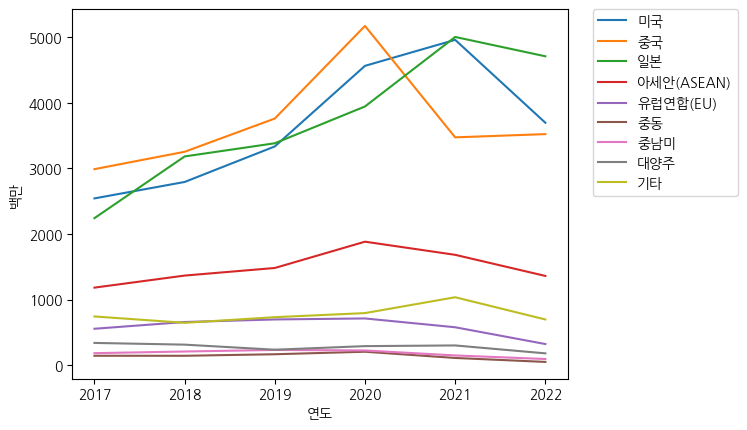

In [83]:
sns.lineplot(data=df, x="연도", y="백만", hue="국가(대륙)별", errorbar=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 📌 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.
- 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [84]:
df[df['연도'] == '2020']

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기(str),분기
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,2020,1/4,1
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,2020,2/4,2
14,미국,컴퓨터 및 주변기기,면세점 이외,2020.3/4,1871,2020,3/4,3
15,미국,컴퓨터 및 주변기기,면세점 이외,2020.4/4,1373,2020,4/4,4
34,미국,가전·전자·통신기기,면세점 이외,2020.1/4,1818,2020,1/4,1
...,...,...,...,...,...,...,...,...
2743,기타,생활용품 및 자동차용품,면세점 이외,2020.4/4,392,2020,4/4,4
2762,기타,기 타,면세점 이외,2020.1/4,939,2020,1/4,1
2763,기타,기 타,면세점 이외,2020.2/4,710,2020,2/4,2
2764,기타,기 타,면세점 이외,2020.3/4,826,2020,3/4,3


In [85]:
df.groupby('상품군별').sum()

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_67643/330318510.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('상품군별').sum()


,백만
상품군별,
가전·전자·통신기기,159338
기 타,417725
농축수산물,756
사무·문구,35694
생활용품 및 자동차용품,213823
서 적,158902
소프트웨어,5094
스포츠·레저용품,93028
아동·유아용품,98792


In [86]:
# 의류 및 패션 관련상품, 화장품 ,음반 비디오 악기
df_fashion = df[df['상품군별'] == '의류 및 패션 관련상품'].groupby(['국가(대륙)별']).sum()
df_cosmetic = df[df['상품군별'] == '화장품'].groupby(['상품군별', '국가(대륙)별']).sum()
df_art = df[df['상품군별'] == '음반·비디오·악기'].groupby(['상품군별', '국가(대륙)별']).sum()

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_67643/2930373928.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_fashion = df[df['상품군별'] == '의류 및 패션 관련상품'].groupby(['국가(대륙)별']).sum()
/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_67643/2930373928.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cosmetic = df[df['상품군별'] == '화장품'].groupby(['상품군별', '국가(대륙)별']).sum()
/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_67643/2930373928.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will defau

In [87]:
df_fashion

,백만
국가(대륙)별,
기타,31925
대양주,20456
미국,380751
아세안(ASEAN),150556
유럽연합(EU),26368
일본,645969
중국,408602
중남미,3238
중동,6273


<AxesSubplot: >

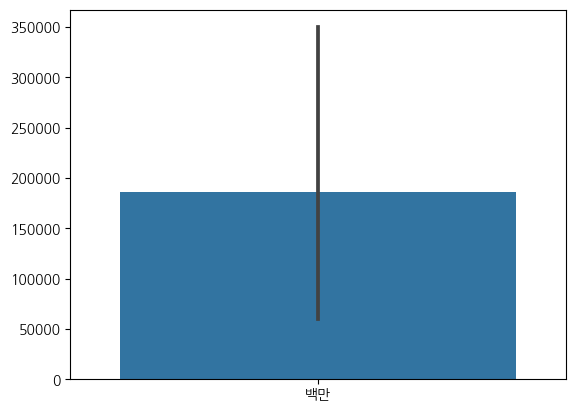

In [88]:
sns.barplot(data=df_fashion)

### 📌 Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.
- 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
- 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.


In [89]:
df

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기(str),분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1/4,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2/4,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3/4,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4/4,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1/4,1
...,...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2/4,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3/4,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4/4,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1/4,1


#### 1) 국가: "미국", 연도: 2017 ~ 2021, 판매상품군: "의류 및 패션 관련상품", "화장품", "음반 비디오 악기"

In [90]:
df_america = df[(df['국가(대륙)별'] == '미국')  & (df['상품군별'].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]))]
df_america

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기(str),분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1/4,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2/4,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3/4,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4/4,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1/4,1
...,...,...,...,...,...,...,...,...
193,미국,화장품,면세점 이외,2021.2/4,8797,2021,2/4,2
194,미국,화장품,면세점 이외,2021.3/4,8125,2021,3/4,3
195,미국,화장품,면세점 이외,2021.4/4,9912,2021,4/4,4
196,미국,화장품,면세점 이외,2022.1/4,6600,2022,1/4,1


In [91]:
df_america = df_america[df_america['연도'] != '2022']
df_america.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기(str),분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1/4,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2/4,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3/4,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4/4,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1/4,1


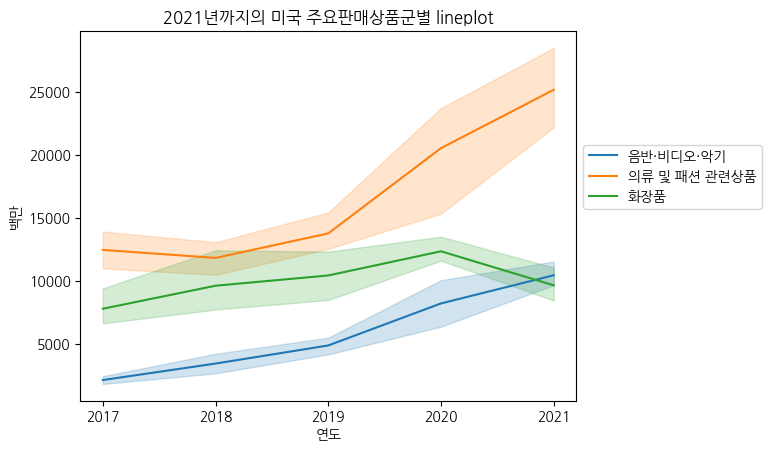

In [102]:
plt.title('2021년까지의 미국 주요판매상품군별 lineplot')
sns.lineplot(data=df_america, x='연도', y='백만', hue='상품군별')
plt.legend(loc='lower left', bbox_to_anchor=(1.0,0.5))

#### 2) 국가: "중국", 연도: 2017 ~ 2021, 판매상품군: "의류 및 패션 관련상품", "화장품", "음반 비디오 악기"

In [93]:
df_china = df[(df['국가(대륙)별'] == '중국')  & (df['상품군별'].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]))]
df_china

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기(str),분기
418,중국,음반·비디오·악기,면세점 이외,2017.1/4,1629,2017,1/4,1
419,중국,음반·비디오·악기,면세점 이외,2017.2/4,1346,2017,2/4,2
420,중국,음반·비디오·악기,면세점 이외,2017.3/4,3026,2017,3/4,3
421,중국,음반·비디오·악기,면세점 이외,2017.4/4,2436,2017,4/4,4
422,중국,음반·비디오·악기,면세점 이외,2018.1/4,1850,2018,1/4,1
...,...,...,...,...,...,...,...,...
501,중국,화장품,면세점 이외,2021.2/4,5546,2021,2/4,2
502,중국,화장품,면세점 이외,2021.3/4,8609,2021,3/4,3
503,중국,화장품,면세점 이외,2021.4/4,10733,2021,4/4,4
504,중국,화장품,면세점 이외,2022.1/4,6032,2022,1/4,1


In [94]:
df_china = df_china[df_china['연도'] != '2022']
df_china.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기(str),분기
418,중국,음반·비디오·악기,면세점 이외,2017.1/4,1629,2017,1/4,1
419,중국,음반·비디오·악기,면세점 이외,2017.2/4,1346,2017,2/4,2
420,중국,음반·비디오·악기,면세점 이외,2017.3/4,3026,2017,3/4,3
421,중국,음반·비디오·악기,면세점 이외,2017.4/4,2436,2017,4/4,4
422,중국,음반·비디오·악기,면세점 이외,2018.1/4,1850,2018,1/4,1


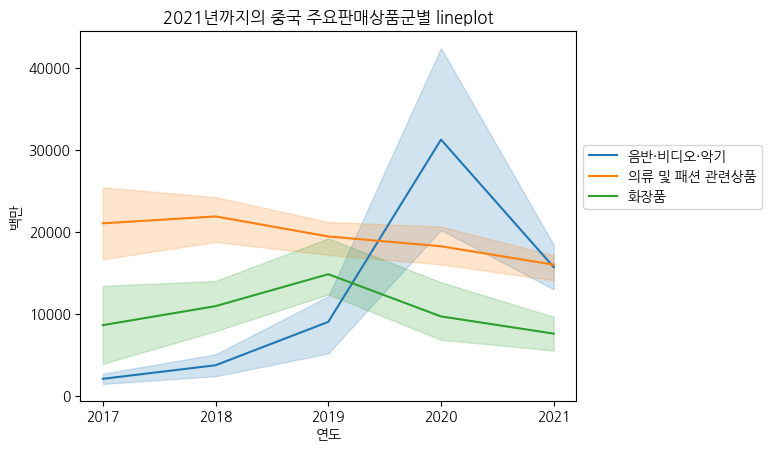

In [101]:
plt.title('2021년까지의 중국 주요판매상품군별 lineplot')
sns.lineplot(data=df_china, x='연도', y='백만', hue='상품군별')
plt.legend(loc='lower left', bbox_to_anchor=(1.0,0.5))

#### 3) 국가: "일본", 연도: 2017 ~ 2021, 판매상품군: "의류 및 패션 관련상품", "화장품", "음반 비디오 악기"

In [96]:
df_japan = df[(df['국가(대륙)별'] == '일본')  & (df['상품군별'].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]))]
df_japan

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기(str),분기
726,일본,음반·비디오·악기,면세점 이외,2017.1/4,537,2017,1/4,1
727,일본,음반·비디오·악기,면세점 이외,2017.2/4,715,2017,2/4,2
728,일본,음반·비디오·악기,면세점 이외,2017.3/4,899,2017,3/4,3
729,일본,음반·비디오·악기,면세점 이외,2017.4/4,673,2017,4/4,4
730,일본,음반·비디오·악기,면세점 이외,2018.1/4,936,2018,1/4,1
...,...,...,...,...,...,...,...,...
809,일본,화장품,면세점 이외,2021.2/4,18768,2021,2/4,2
810,일본,화장품,면세점 이외,2021.3/4,23380,2021,3/4,3
811,일본,화장품,면세점 이외,2021.4/4,22555,2021,4/4,4
812,일본,화장품,면세점 이외,2022.1/4,26664,2022,1/4,1


In [97]:
df_japan = df_japan[df_japan['연도'] != '2022']
df_japan.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기(str),분기
726,일본,음반·비디오·악기,면세점 이외,2017.1/4,537,2017,1/4,1
727,일본,음반·비디오·악기,면세점 이외,2017.2/4,715,2017,2/4,2
728,일본,음반·비디오·악기,면세점 이외,2017.3/4,899,2017,3/4,3
729,일본,음반·비디오·악기,면세점 이외,2017.4/4,673,2017,4/4,4
730,일본,음반·비디오·악기,면세점 이외,2018.1/4,936,2018,1/4,1


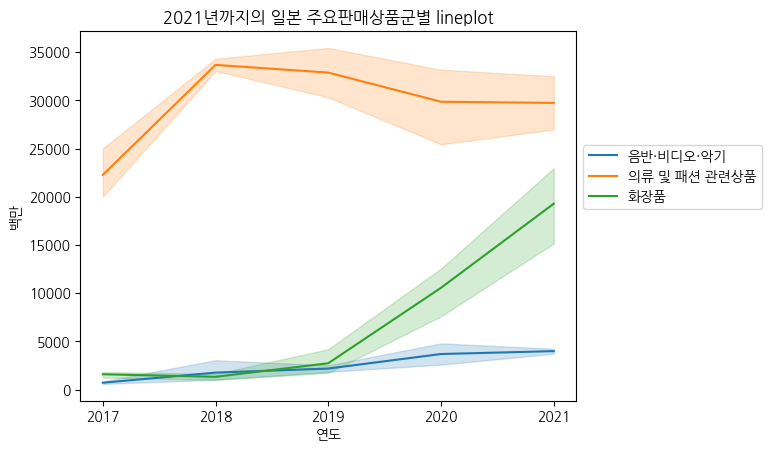

In [100]:
plt.title('2021년까지의 일본 주요판매상품군별 lineplot')
sns.lineplot(data=df_japan, x='연도', y='백만', hue='상품군별')
plt.legend(loc='lower left', bbox_to_anchor=(1.0,0.5))

### 📌 Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!
- 지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
- KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
- 조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
- 행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.